In [45]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Para codificar las variables
from sklearn.preprocessing import LabelEncoder 

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

<font color= green>Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:
- Estandarizar las variables numéricas de vuestro set de datos
- Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.
- Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.
- Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [97]:
df = pd.read_pickle('Datos/Travel_Insurance_limpio.pkl')
df.head(2)

,Age,Employment_Type,Graduate_Or_Not,Annual_Income,Family_Members,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0


In [66]:
df.dtypes

Age                         int64
Employment_Type          category
Graduate_Or_Not          category
Annual_Income               int64
Family_Members              int64
Chronic_Diseases            int64
Frequent_Flyer           category
Ever_Travelled_Abroad    category
Travel_Insurance            int64
dtype: object

In [98]:
df1 = df.copy()

### <font color=violet>Estandarización

Como ya sabemos que el método Standard Scaler es el más ampliamente usado, lo vamos a aplicar directamente. 

In [99]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [100]:
# recordemos que la estandarización solo se hace para las variables predictoras numéricas

numericas = df1.select_dtypes(include = np.number)
numericas.head()

,Age,Annual_Income,Family_Members,Chronic_Diseases,Travel_Insurance
0,31,400000,6,1,0
1,31,1250000,7,0,0
2,34,500000,4,1,1
3,28,700000,3,1,0
4,28,700000,8,1,0


In [101]:
numericas.drop(["Travel_Insurance"], axis = 1, inplace = True)

In [102]:
# Ajustamos nuestros datos
scaler.fit(numericas)

# transformamos los datos

X_escaladas = scaler.transform(numericas)

# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,Age,Annual_Income,Family_Members,Chronic_Diseases
0,0.426113,-1.482446,0.629929,1.415063
1,0.426113,0.874835,1.197592,-0.706682


In [103]:
# Dropeamos las columnas sin estandarizar del df original.

df1.drop(["Age", "Annual_Income", "Family_Members", "Chronic_Diseases"], axis = 1, inplace=True)
df1.head()

,Employment_Type,Graduate_Or_Not,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance
0,Government Sector,Yes,No,No,0
1,Private Sector/Self Employed,Yes,No,No,0
2,Private Sector/Self Employed,Yes,No,No,1
3,Private Sector/Self Employed,Yes,No,No,0
4,Private Sector/Self Employed,Yes,Yes,No,0


In [104]:
# Unimos las numéricas estándar al df original.

df1 = pd.concat([df1, numericas_estandar], axis = 1)

# chequeamos que esta todo bien
df1.head()

,Employment_Type,Graduate_Or_Not,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance,Age,Annual_Income,Family_Members,Chronic_Diseases
0,Government Sector,Yes,No,No,0.0,0.426113,-1.482446,0.629929,1.415063
1,Private Sector/Self Employed,Yes,No,No,0.0,0.426113,0.874835,1.197592,-0.706682
2,Private Sector/Self Employed,Yes,No,No,1.0,1.453557,-1.205119,-0.505398,1.415063
3,Private Sector/Self Employed,Yes,No,No,0.0,-0.601330,-0.650464,-1.073061,1.415063
4,Private Sector/Self Employed,Yes,Yes,No,0.0,-0.601330,-0.650464,1.765256,1.415063


### <font color=violet>Codificación con datos estandarizados

In [105]:
df1.head(2)

,Employment_Type,Graduate_Or_Not,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance,Age,Annual_Income,Family_Members,Chronic_Diseases
0,Government Sector,Yes,No,No,0.0,0.426113,-1.482446,0.629929,1.415063
1,Private Sector/Self Employed,Yes,No,No,0.0,0.426113,0.874835,1.197592,-0.706682


In [106]:
categoricas = df1.select_dtypes(include = 'category')
categoricas.head()

,Employment_Type,Graduate_Or_Not,Frequent_Flyer,Ever_Travelled_Abroad
0,Government Sector,Yes,No,No
1,Private Sector/Self Employed,Yes,No,No
2,Private Sector/Self Employed,Yes,No,No
3,Private Sector/Self Employed,Yes,No,No
4,Private Sector/Self Employed,Yes,Yes,No


Creemos que todas nuestras variables categóricas tienen orden, por lo tanto vamos a usar el método Label Encoding.

In [107]:
# iniciamos el método
le = LabelEncoder()

df1['Employment_Type_le']=le.fit_transform(df1['Employment_Type'])
df1['Graduate_Or_Not_le']=le.fit_transform(df1['Graduate_Or_Not'])
df1['Frequent_Flyer_le']=le.fit_transform(df1['Frequent_Flyer'])
df1['Ever_Travelled_Abroad_le']=le.fit_transform(df1['Ever_Travelled_Abroad'])

In [108]:
# chequeamos el dataframe de nuevo

df1.sample(10)

,Employment_Type,Graduate_Or_Not,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance,Age,Annual_Income,Family_Members,Chronic_Diseases,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le
348,NaN,NaN,NaN,NaN,NaN,0.426113,0.042854,-0.505398,1.415063,2,2,2,2
406,Private Sector/Self Employed,Yes,No,No,1.0,-0.601330,-1.066455,-0.505398,-0.706682,1,1,0,0
884,Government Sector,Yes,Yes,No,1.0,-0.601330,0.736172,-1.073061,-0.706682,0,1,1,0
1040,Government Sector,Yes,Yes,No,1.0,1.453557,1.568153,-1.073061,1.415063,0,1,1,0
1357,Private Sector/Self Employed,No,No,No,0.0,NaN,NaN,NaN,NaN,1,0,0,0
768,NaN,NaN,NaN,NaN,NaN,0.768594,-0.373137,2.332919,-0.706682,2,2,2,2
487,Private Sector/Self Employed,Yes,No,No,1.0,-1.628773,0.597508,0.062266,1.415063,1,1,0,0
704,Government Sector,Yes,No,No,1.0,1.453557,-1.205119,1.197592,1.415063,0,1,0,0
1582,Private Sector/Self Employed,Yes,No,No,0.0,NaN,NaN,NaN,NaN,1,1,0,0
15,Private Sector/Self Employed,Yes,No,No,0.0,1.453557,-0.650464,1.197592,-0.706682,1,1,0,0


Dataset con las variables categóricas codificadas y las numéricas estandarizadas.

In [109]:
# por último nos queda eliminar las columnas categóricas originales porque ya no nos hacen falta. 

df1.drop(['Employment_Type', 'Graduate_Or_Not', 'Frequent_Flyer','Ever_Travelled_Abroad'], axis = 1, inplace=True)
df1.head(2)

,Travel_Insurance,Age,Annual_Income,Family_Members,Chronic_Diseases,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le
0,0.0,0.426113,-1.482446,0.629929,1.415063,0,1,0,0
1,0.0,0.426113,0.874835,1.197592,-0.706682,1,1,0,0


### <font color=violet>Codificación con datos sin estandarizar

In [110]:
df2 = df.copy()
df2.head(2)

,Age,Employment_Type,Graduate_Or_Not,Annual_Income,Family_Members,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0


Creemos que todas nuestras variables categóricas tienen orden, por lo tanto vamos a usar el método Label Encoding.

In [111]:
# iniciamos el método
le = LabelEncoder()

df2['Employment_Type_le']=le.fit_transform(df2['Employment_Type'])
df2['Graduate_Or_Not_le']=le.fit_transform(df2['Graduate_Or_Not'])
df2['Frequent_Flyer_le']=le.fit_transform(df2['Frequent_Flyer'])
df2['Ever_Travelled_Abroad_le']=le.fit_transform(df2['Ever_Travelled_Abroad'])

In [112]:
# chequeamos el dataframe de nuevo

df2.sample(10)

,Age,Employment_Type,Graduate_Or_Not,Annual_Income,Family_Members,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad,Travel_Insurance,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le
238,29,Private Sector/Self Employed,Yes,600000,3,1,No,No,0,1,1,0,0
539,33,Government Sector,No,400000,4,0,No,No,0,0,0,0,0
480,34,Private Sector/Self Employed,Yes,1050000,7,0,Yes,No,1,1,1,1,0
1969,31,Private Sector/Self Employed,Yes,500000,4,1,No,No,0,1,1,0,0
1438,32,Government Sector,Yes,850000,3,0,Yes,No,0,0,1,1,0
311,34,Private Sector/Self Employed,Yes,1500000,7,0,Yes,Yes,1,1,1,1,1
18,29,Private Sector/Self Employed,Yes,1050000,5,1,No,No,1,1,1,0,0
1895,26,Government Sector,Yes,500000,3,0,No,No,0,0,1,0,0
1554,31,Private Sector/Self Employed,Yes,900000,5,0,Yes,No,0,1,1,1,0
1059,32,Government Sector,Yes,350000,4,0,No,No,0,0,1,0,0


Dataset con las variables categóricas codificadas y las numéricas sin estandarizar.

In [113]:
# por último nos queda eliminar las columnas categóricas originales porque ya no nos hacen falta. 

df2.drop(['Employment_Type', 'Graduate_Or_Not', 'Frequent_Flyer','Ever_Travelled_Abroad'], axis = 1, inplace=True)
df2.head(2)

,Age,Annual_Income,Family_Members,Chronic_Diseases,Travel_Insurance,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le
0,31,400000,6,1,0,0,1,0,0
1,31,1250000,7,0,0,1,1,0,0


### <font color=violet>Desbalanceo

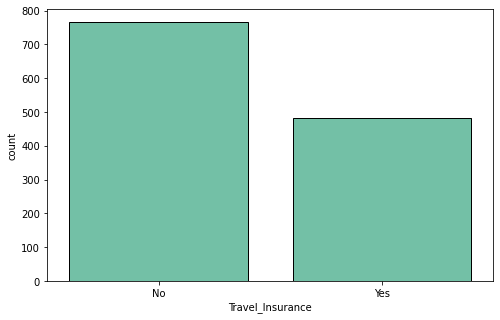

In [114]:
# recordemos como estaban distribuidos nuestros datos

plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "Travel_Insurance",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

### **Downsampling**

Ajustaremos la cantidad de datos de la categoría mayoritaria a la minoritaria. 

In [115]:
df1.head()

,Travel_Insurance,Age,Annual_Income,Family_Members,Chronic_Diseases,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le
0,0.0,0.426113,-1.482446,0.629929,1.415063,0,1,0,0
1,0.0,0.426113,0.874835,1.197592,-0.706682,1,1,0,0
2,1.0,1.453557,-1.205119,-0.505398,1.415063,1,1,0,0
3,0.0,-0.601330,-0.650464,-1.073061,1.415063,1,1,0,0
4,0.0,-0.601330,-0.650464,1.765256,1.415063,1,1,1,0


In [116]:
df1.dtypes

Travel_Insurance            float64
Age                         float64
Annual_Income               float64
Family_Members              float64
Chronic_Diseases            float64
Employment_Type_le            int32
Graduate_Or_Not_le            int32
Frequent_Flyer_le             int32
Ever_Travelled_Abroad_le      int32
dtype: object

In [118]:
# lo primero que hacemos es sacar el número de registros que tenemos para la clase minoritaria
num_minoritarios = df1["Travel_Insurance"].value_counts()[1]
num_minoritarios

483

In [119]:
# nos creamos un dataframe solo con las filas donde la variable respuesta sea Yes. 
minoritarios = df1[df1["Travel_Insurance"] == 1]
minoritarios.head(2)

,Travel_Insurance,Age,Annual_Income,Family_Members,Chronic_Diseases,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le
2,1.0,1.453557,-1.205119,-0.505398,1.415063,1,1,0,0
7,1.0,0.426113,1.152163,-1.073061,-0.706682,1,1,1,1


In [121]:
# extraemos una muestra de la categoría mayoritaria que sea del mismo tamaño que la clase minotaria

mayoritarios = df1[df1["Travel_Insurance"] == 0].sample(num_minoritarios, random_state = 42)
mayoritarios.head(2)

,Travel_Insurance,Age,Annual_Income,Family_Members,Chronic_Diseases,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le
860,0.0,-0.258849,0.736172,0.629929,1.415063,1,1,0,0
1647,0.0,NaN,NaN,NaN,NaN,1,1,1,0


In [122]:
# Ahora es el momento de unir los *dataframes*
balanceado = pd.concat([minoritarios,mayoritarios],axis = 0)
balanceado.head(2)

,Travel_Insurance,Age,Annual_Income,Family_Members,Chronic_Diseases,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le
2,1.0,1.453557,-1.205119,-0.505398,1.415063,1,1,0,0
7,1.0,0.426113,1.152163,-1.073061,-0.706682,1,1,1,1


In [123]:
# chequeamos como es nuestro dataframe ahora
balanceado["Travel_Insurance"].value_counts()

1.0    483
0.0    483
Name: Travel_Insurance, dtype: int64

### **Upsampling**
Ajustaremos la cantidad de datos de la categoría minoritaria a la mayoritaria. 

In [124]:
num_mayoritarios = df1["Travel_Insurance"].value_counts()[0]
num_mayoritarios

766

In [125]:
# seleccionamos ls datos de la clase mayoritaria

mayoritarios2 = df1[df1["Travel_Insurance"] == 0]
mayoritarios2.head(2)

,Travel_Insurance,Age,Annual_Income,Family_Members,Chronic_Diseases,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le
0,0.0,0.426113,-1.482446,0.629929,1.415063,0,1,0,0
1,0.0,0.426113,0.874835,1.197592,-0.706682,1,1,0,0


In [126]:
# hacemos un selección aleatoria de datos de la clase minoritaria, para tener el mismo número que la clase mayoritaria

minoritarios2 = df1[df1["Travel_Insurance"] ==1].sample(num_mayoritarios, replace=True)
minoritarios2.head(2)

,Travel_Insurance,Age,Annual_Income,Family_Members,Chronic_Diseases,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le
1644,1.0,NaN,NaN,NaN,NaN,1,1,0,0
101,1.0,-0.258849,-1.205119,-1.073061,1.415063,1,1,1,1


In [127]:
# unimos los dos dataframes

balanceado2 = pd.concat([mayoritarios2,minoritarios2], axis = 0)
balanceado2.head(2)

,Travel_Insurance,Age,Annual_Income,Family_Members,Chronic_Diseases,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le
0,0.0,0.426113,-1.482446,0.629929,1.415063,0,1,0,0
1,0.0,0.426113,0.874835,1.197592,-0.706682,1,1,0,0


In [129]:
# chequeamos como quedaron cada una de nuestras categorías

balanceado2["Travel_Insurance"].value_counts()

0.0    766
1.0    766
Name: Travel_Insurance, dtype: int64

Guardamos los archivos para las próximas lecciones.

In [ ]:
df1.to_pickle("Datos/Travel_Insurance_esta_enco.pkl")
df2.to_pickle("Datos/Travel_Insurance_enco.pkl")
balanceado.to_pickle("Datos/Travel_Insurancec_esta_enco_down.pkl")
balanceado2.to_pickle("Datos/Travel_Insurance_esta_enco_up.pkl")